# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [139]:
import pandas as pd
import numpy as np
import pandas as pd
iris_df = pd.read_csv("iris.csv")
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [243]:
#iris_df.info()
print(iris_df.isna().sum())

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


Fill missing values with median of that particular column

In [244]:
iris_df_replaced=iris_df.fillna(iris_df.median())
iris_df_replaced.info()
print(iris_df_replaced.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [245]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

print(iris_df_replaced.head())
print('unique categories before',iris_df_replaced['Species'].unique())

iris_df_replaced['Species'] = class_label_encoder.fit_transform(iris_df_replaced.Species)

print(iris_df_replaced.head())
print('unique categories now',iris_df_replaced['Species'].unique())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
unique categories before ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
unique categories now [0

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [246]:
corr_matrix=iris_df_replaced.corr()

In [247]:
listOfCol=corr_matrix['Species']
#listOfCol[listOfCol[listOfCol<0.1]]

iris_df_replaced.loc[:,(iris_df_replaced.corr()['Species'] < 0.1) | (iris_df_replaced.corr()['Species'] > -0.1)].head()

#no column dropped

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [248]:
iris_df_replaced.var()
iris_df_replaced.loc[:,(iris_df_replaced.var()< 0.1)].count()

#no row satisfy the result set

Series([], dtype: int64)

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

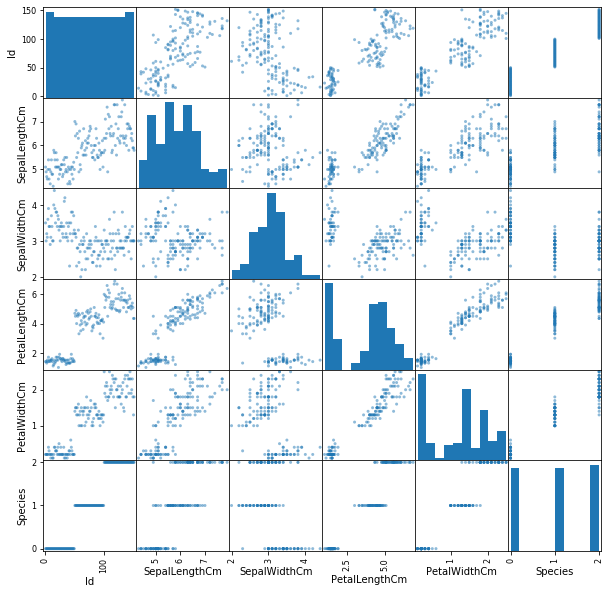

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(iris_df_replaced, alpha=0.5, figsize=(10, 10))
plt.show()

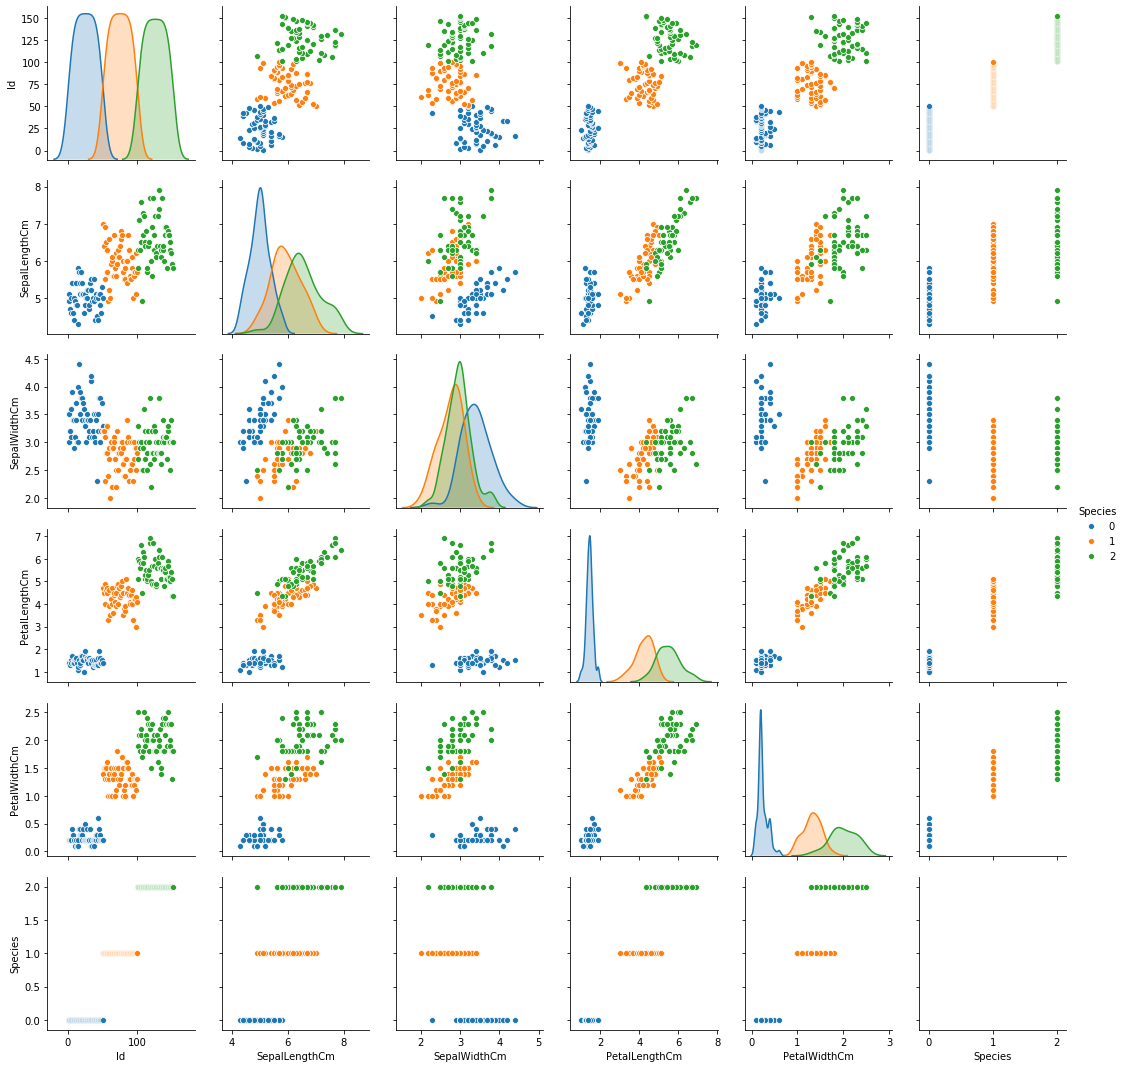

In [250]:
import seaborn as sns
sns.pairplot(iris_df_replaced,diag_kind='kde', hue='Species')

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [251]:
from sklearn.model_selection import train_test_split
test_size = 0.20 # taking 80:20 training and test set
seed = 9  # Random numbmer seeding for reapeatability of the code
X=iris_df_replaced.drop(labels = "Id", axis = 1)
y=iris_df_replaced[["Species"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [252]:
print('train.shape:',X_train.shape)
print('test.shape :',X_test.shape)

train.shape: (121, 5)
test.shape : (31, 5)


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [253]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn import metrics

#default k=5
NNH = KNeighborsClassifier()
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [254]:
predicted_labels = NNH.predict(X_test)
print('with k=5 ; Train accuracy',NNH.score(X_train, y_train))
print('Test accuracy',NNH.score(X_test, y_test))

with k=5 ; Train accuracy 1.0
Test accuracy 1.0


In [255]:
#default k=5
NNH3 = KNeighborsClassifier(n_neighbors=3)
NNH3.fit(X_train, y_train)
predicted_labels = NNH3.predict(X_test)
## Train Accuracy
print('k=3; Train accuracy',NNH3.score(X_train, y_train))
print('Test accuracy',NNH3.score(X_test, y_test))

NNH9 = KNeighborsClassifier(n_neighbors=9)
NNH9.fit(X_train, y_train)
predicted_labels = NNH3.predict(X_test)
## Train Accuracy
print('k=9; Train accuracy',NNH9.score(X_train, y_train))
print('Test accuracy',NNH9.score(X_test, y_test))

k=3; Train accuracy 1.0
Test accuracy 1.0
k=9; Train accuracy 1.0
Test accuracy 1.0


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [256]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
maxK = int(np.sqrt(X_train.shape[0]))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, list(range(1,20))))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    print('value for k= ' , k,',score=',scores.mean())
    
# changing to misclassification error
misError = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

value for k=  1 ,score= 1.0
value for k=  3 ,score= 1.0
value for k=  5 ,score= 1.0
value for k=  7 ,score= 1.0
value for k=  9 ,score= 1.0
value for k=  11 ,score= 1.0
value for k=  13 ,score= 0.991869918699187
value for k=  15 ,score= 0.991869918699187
value for k=  17 ,score= 0.991869918699187
value for k=  19 ,score= 0.991869918699187
The optimal number of neighbors is 1


In [257]:
NNH = KNeighborsClassifier(n_neighbors=optimal_k)
print('fit',NNH.fit(X_train, y_train))
NNH.score(X_test, y_test)


fit KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


1.0

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [258]:
import matplotlib.pyplot as plt

k= [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] ;cv_scores= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.991869918699187, 0.991869918699187, 0.991869918699187, 0.991869918699187]


Text(0, 0.5, 'Testing Accuracy')

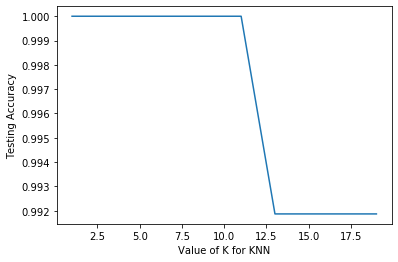

In [259]:
%matplotlib inline

print('k=',neighbors,';cv_scores=',cv_scores)
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [321]:
bc_df = pd.read_csv("bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [322]:
print('shape=',bc_df.shape)
bc_df.info()

shape= (699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [323]:
bc_df.describe(include='all').T
#bc_df.describe(include='all')['top']

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


#### Check Missing Values

In [324]:
bc_df.isna().sum()


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [325]:
bc_df[bc_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [326]:
bc_df['Bare Nuclei'].describe(include="all").top

'1'

In [341]:
bc_df[bc_df['Bare Nuclei'] == '?']=bc_df['Bare Nuclei'].describe(include="all").top


In [342]:
#bc_df['Bare Nuclei']
bc_df[bc_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

0

### Question 5
#### Find the distribution of target variable (Class) 

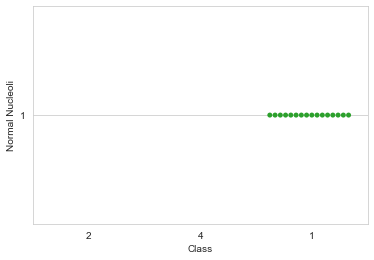

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Class", y="Normal Nucleoli", data=bc_df)
plt.show()

#### Plot the distribution of target variable using histogram

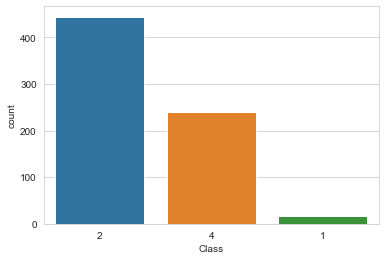

In [348]:
#bc_df['Class'].plot.hist(grid=True, bins=5)
sns.countplot(bc_df['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [350]:
#bc_df['Bare Nuclei'] =bc_df['Bare Nuclei'].astype('int64') 
#bc_df['Bare Nuclei'].dtype
bc_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.plotting.scatter_matrix(bc_df, alpha=0.5, figsize=(10, 10))


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.